# CW536- 2226909
by Ugochiyenum Nicole Ugbomeh

**Installing and Importing Necessary Packages**

In [1]:
!pip install plotly_express
!pip install tensorflow

In [193]:
## Importing the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import os
import random
import cv2
from skimage import feature
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import KFold
import plotly_express as px
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import datasets, layers, models, Sequential, optimizers

### **TASK ONE**

Task: To determine the better classifier.

Key processes involve initialising HOG feature extraction, loading and converting data into numpy arrays, visualising sample distribution via histograms, displaying sample contents for each class, and splitting the dataset into 80% training and 20% testing sets.

Classification experiments are conducted with SVM, CNN, K5 FOLD - SVM, and K5 FOLD - CNN, recording and comparing precision, recall, F1 scores, and accuracy. Additionally, class imbalance is addressed using HOG features and SMOTE.



**LOADING THE DATA**


Loading images...

Calculating class distribution...
       Class  Number of Samples
0     heart                 228
1  non-heart                925
Total images: 1153

Showing class distribution bar chart...


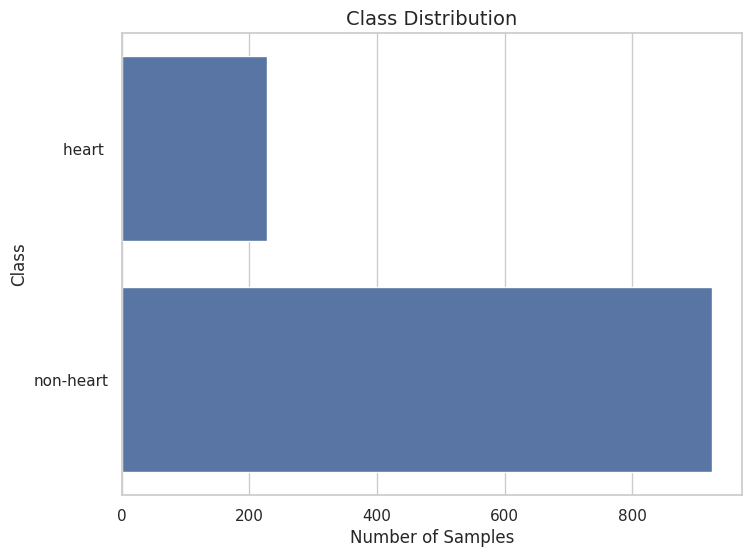

Size of target:  1153
Size of original repository:  (1153, 16384)
Example of the original repository: 
[[10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  1  1]
 [ 0  0  0 ...  0  0  0]]
Size of HOG features data structure:  (1153, 2592)
Example of the HOG repository: 
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.28502181 0.16723133 0.2261074 ]
 [0.         0.         0.         ... 0.2788824  0.27787874 0.26522504]]
Class labels ['non-heart' 'non-heart' 'non-heart' ... 'heart ' 'heart ' 'heart ']


In [3]:
#code reference {4}
################################ 1. DEFINE CLASS TO EXTRACT HOG FEATURES ################################
class HOG:
    def __init__(self, orientations = 9, pixelsPerCell = (8, 8),
        cellsPerBlock = (3, 3), transform = False):
        # store the number of orientations, pixels per cell,
        # cells per block, and whether or not power law
        # compression should be applied
        self.orientations = orientations
        self.pixelsPerCell = pixelsPerCell
        self.cellsPerBlock = cellsPerBlock
        self.transform = transform

    def describe(self, image):
        # compute HOG for the image
        hist = feature.hog(image, orientations = self.orientations,
            pixels_per_cell = self.pixelsPerCell,
            cells_per_block = self.cellsPerBlock,
            transform_sqrt = self.transform)
        ## return the HOG features
        return hist

hog = HOG(orientations = 18, pixelsPerCell = (10, 10), cellsPerBlock = (1, 1), transform = True)

########  2. LOAD IMAGES (FOR ORIGINAL REPO) and EXTRACT HOG FEATURES (FOR FEATURE REPO) ########

resize_factor = 128 # applies for both height and width

path = '/content/drive/MyDrive/Colab Notebooks/cw_data_task1/'
datarepo = [] # List to append the images as 2D numpy arrays
originalrepo = [] # Create a repo for flattened pixels
hogrepo = [] # Create a list to append the HOG features
target = [] # List to append the target/class/label
print('\nLoading images...')
for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0)
                img = cv2.resize(img, (resize_factor, resize_factor))
                datarepo.append(img)
                originalrepo.append(img.flatten())
                # Extract HOG and append to HOG repo
                hogfeatures = hog.describe(img)
                hogrepo.append(hogfeatures)
                # Append the folder where the image is to the target list
                target.append(root.replace(path,'').replace('\\','').replace('/',''))
            except Exception as e:
                print("Invalid file "+file+" skipped.")

# Convert the repo lists into numpy arrays
originalrepo = np.array(originalrepo)
hogrepo = np.array(hogrepo)
target = np.array(target)

########################## 3. CALCULATE THE DISTRIBUTION AND SHOW REPOS ##########################

print('\nCalculating class distribution...')
histo = [['Class','Number of Samples']]
for i, label1 in enumerate(sorted(list(set(target)))):
    cont = 0
    for j, label2 in enumerate(target):
        if label1 == label2:
            cont+=1
    histo.append([label1,cont])
histo.append(['Total Samples', len(target)])
## Load as a panda
histo_panda = pd.DataFrame.from_records(histo[1:-1], columns=histo[0])
print(histo_panda)
print('Total images: '+str(len(target)))
## Create a histogram using seaborn
sns.set(style="whitegrid")
sns_plot = sns.barplot(y="Class", x="Number of Samples", data=histo_panda)
# Set labels and title
sns_plot.set_xlabel("Number of Samples", fontsize=12)
sns_plot.set_ylabel("Class", fontsize=12)
sns_plot.set_title("Class Distribution", fontsize=14)
sns_plot.figure.set_size_inches(8,6)
sns.set(font_scale=0.8)
print('\nShowing class distribution bar chart...')
plt.show()
print('Size of target: ', len(target))
print('Size of original repository: ', originalrepo.shape)
print('Example of the original repository: ')
print(originalrepo)
print('Size of HOG features data structure: ', hogrepo.shape)
print('Example of the HOG repository: ')
print(hogrepo)
print('Class labels', target)

**DISPLAY OF HEART IMAGES**

Heart Images


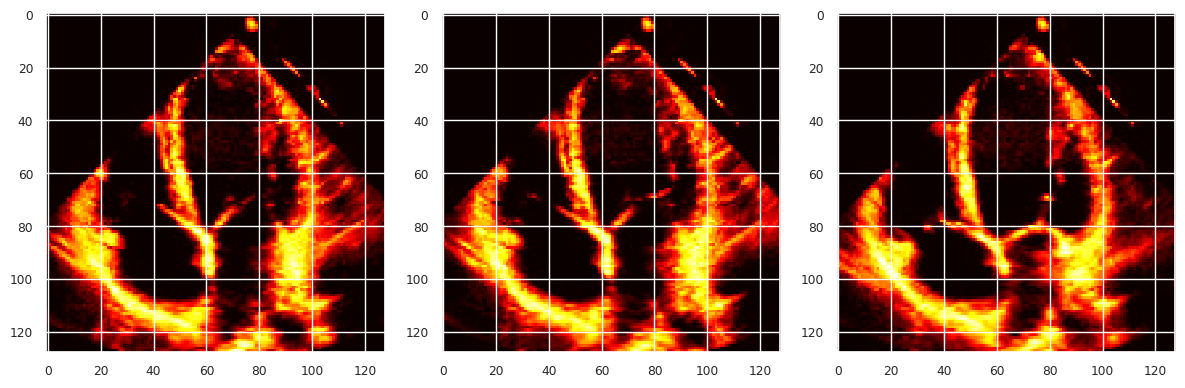

In [4]:
#Display the heart images in grey scale
heartrepo = originalrepo[np.asarray(target) == 'heart ']
heart_sample = random.sample(range(len(heartrepo)), 3)
fig,axes = plt.subplots(1,3, figsize=[12,9])

fig.tight_layout() # add spacing between subplots
for i, dat in enumerate(axes.flatten()):
    if i<len(heart_sample): # This "if" is here to avoid that, if the user specifies more subplots than data, the program crashes due to lack of data to plot
        dat.imshow(np.asarray(heartrepo[heart_sample[i]]).reshape(128,128),
                   cmap='hot', interpolation='nearest')
print('Heart Images')
plt.show()

Non- heart (Abdominal Images)


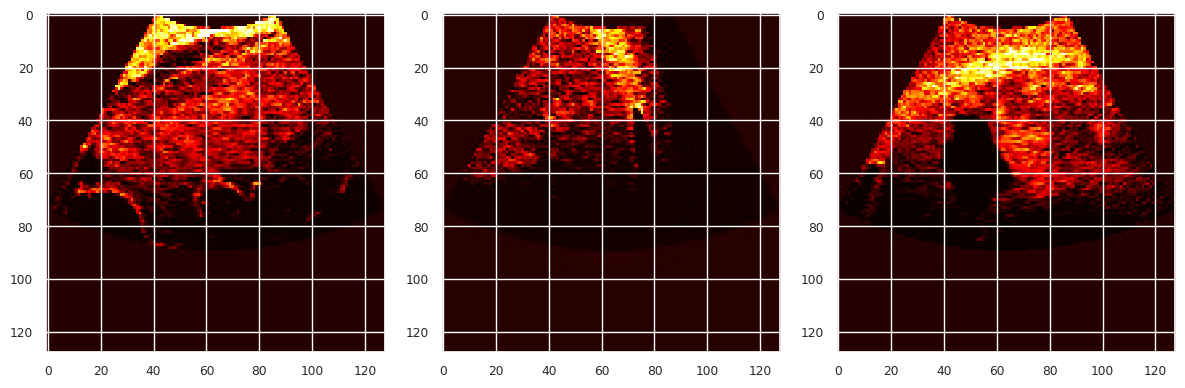

In [5]:
#Display the non-heart (Abdominal) images in grey scale
abdominalprepo = originalrepo[np.asarray(target) == 'non-heart']
symbols_visualise = random.sample(range(len(abdominalprepo)), 3)
fig,axes = plt.subplots(1,3, figsize=[12,9])
fig.tight_layout() # add spacing between subplots
for i, dat in enumerate(axes.flatten()):
    if i<len(symbols_visualise): # This "if" is here to avoid that, if the user specifies more subplots than data, the program crashes due to lack of data to plot
        dat.imshow(np.asarray(abdominalprepo[symbols_visualise[i]]).reshape(128,128),
                   cmap='hot', interpolation='nearest')
print('Non- heart (Abdominal Images)')
plt.show()

**TRAINING THE DATA/ USING THE BINARISED TARGETS - SVM**

In [6]:
#binarizing target names
target_new = [0 if i == 'heart ' else 1 for i in target]
target_new =np.array(target_new)
print(target_new,target_new.shape)
x_train, x_test, y_train, y_test = train_test_split(originalrepo,target_new, stratify=target_new, test_size=0.2)
print('Number of heart and non-heart (Abdominal) samples in the training set: ',np.count_nonzero(y_train == 0),np.count_nonzero(y_train == 1))
print('Number of heart and non-heart (Abdominal) samples in the test set: ',np.count_nonzero(y_test == 0),np.count_nonzero(y_test == 1))

[1 1 1 ... 0 0 0] (1153,)
Number of heart and non-heart (Abdominal) samples in the training set:  182 740
Number of heart and non-heart (Abdominal) samples in the test set:  46 185


**TRAINING THE DATA/ USING THE BINARISED TARGETS - CNN**

In [33]:
#binarizing target names
x_train_cn, x_test_cn, y_train_cn, y_test_cn = train_test_split(originalrepo,target_new, stratify=target_new, test_size=0.2)
print('Number of heart and non-heart (Abdominal) samples in the training set: ',np.count_nonzero(y_train_cn == 0),np.count_nonzero(y_train_cn == 1))
print('Number of heart and non-heart (Abdominal) samples in the test set: ',np.count_nonzero(y_test_cn == 0),np.count_nonzero(y_test_cn == 1))

Number of heart and non-heart (Abdominal) samples in the training set:  182 740
Number of heart and non-heart (Abdominal) samples in the test set:  46 185


**SVM CLASSIFIER / NON- NEURAL NETWORK**

In [8]:
#Initializing the SVM Classifier
svmmodel= SVC(kernel='linear', random_state=42)
#Training the data with the classifier
binSVM = svmmodel.fit(x_train,y_train)

# Test the SVM model by predicting Y
y_predicted = binSVM.predict(x_test)

#Get accuracy to evaluate the performance of training set
svmaccuracy = binSVM.score(x_train,y_train)
print( "Binarised Training set accuracy:", svmaccuracy)

#get the confusion matrix of the SVM classifier
cm = confusion_matrix(y_test, y_predicted)
print("Binarized Confusion Matrix:" ,cm)


Binarised Training set accuracy: 1.0
Binarized Confusion Matrix: [[ 46   0]
 [  0 185]]


**PLOT SHOWING SVM CONFUSION MATRIX**

<Axes: >

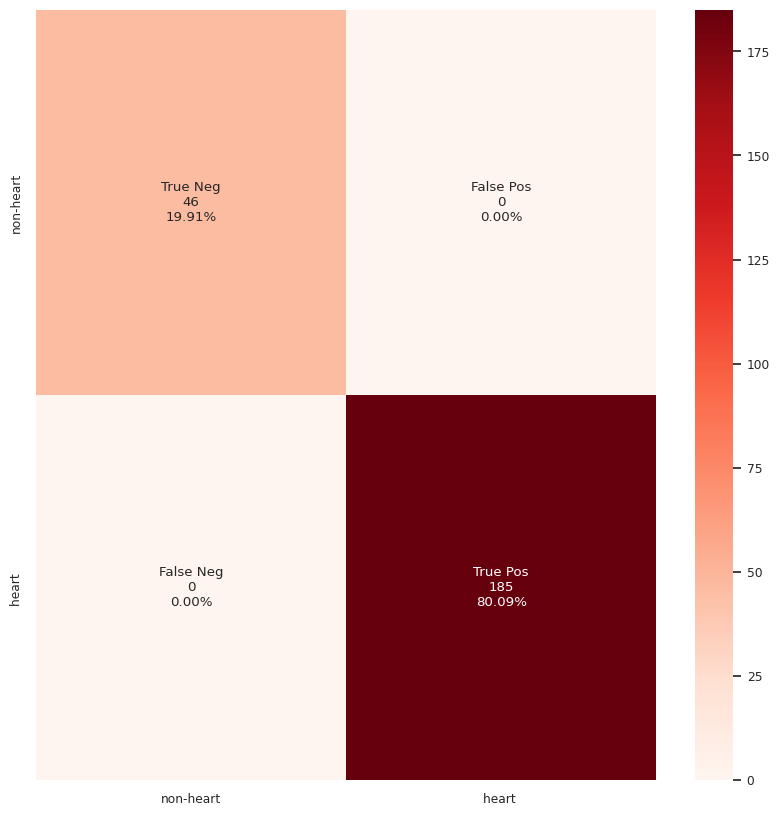

In [9]:
# Plotting the confusion matrix
plt.figure(figsize = (10,10))
labels = ['TN','FP','FN','TP']
classes = ['non-heart','heart ' ]
labels = np.asarray(labels).reshape(2,2)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap= "Reds",xticklabels = classes,yticklabels = classes)

**from the SVM classifier , one can see that the non-hearts and hearts have been classified correctly based on the confusion matrix report with no false negative or false postive values.**

**SVM CLASSIFICATION REPORT**

In [10]:
# imported classification_report from sklearn.metrics at the top
#Generata a classification report for each class

report_of_each_class = classification_report(y_test,y_predicted)
print('SVM CLASSIFICATION REPORT OF BINARISED DATA')
print(report_of_each_class)


SVM CLASSIFICATION REPORT OF BINARISED DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       185

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



**to support the SVM confusion matrix results, the classfier displays a 100% accuracy, precision, recall anf f-1 score**

**5 FOLD CROSS VALIDATION SVM**

In [11]:
kf = KFold(n_splits=5)
kf.get_n_splits(originalrepo)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [12]:
# Initialize KFold cross-validation
kf = KFold(n_splits=5)

# Iterate over folds
i = 1
for train_index, test_index in kf.split(originalrepo):
    print('Fold', i)
    print('TRAIN INDEXES:', train_index)
    print('TEST INDEXES:', test_index)

    # Extract training and testing data using indices
    x_train, x_test = originalrepo[train_index], originalrepo[test_index]
    y_train, y_test = originalrepo[train_index], originalrepo[test_index]
    i += 1

Fold 1
TRAIN INDEXES: [ 231  232  233  234  235  236  237  238  239  240  241  242  243  244
  245  246  247  248  249  250  251  252  253  254  255  256  257  258
  259  260  261  262  263  264  265  266  267  268  269  270  271  272
  273  274  275  276  277  278  279  280  281  282  283  284  285  286
  287  288  289  290  291  292  293  294  295  296  297  298  299  300
  301  302  303  304  305  306  307  308  309  310  311  312  313  314
  315  316  317  318  319  320  321  322  323  324  325  326  327  328
  329  330  331  332  333  334  335  336  337  338  339  340  341  342
  343  344  345  346  347  348  349  350  351  352  353  354  355  356
  357  358  359  360  361  362  363  364  365  366  367  368  369  370
  371  372  373  374  375  376  377  378  379  380  381  382  383  384
  385  386  387  388  389  390  391  392  393  394  395  396  397  398
  399  400  401  402  403  404  405  406  407  408  409  410  411  412
  413  414  415  416  417  418  419  420  421  422  423

In [13]:
# Cross validating the original data of K5fold SVM
scores_svm = cross_validate(svmmodel, originalrepo, target_new, cv=5 , scoring = 'accuracy')
print('SVM cross-validated scores: ', scores_svm)
print('Precision for SVM: ',cross_validate(svmmodel, originalrepo, target_new, cv=5, scoring = 'precision'))
print('Recall for SVM: ',cross_validate(svmmodel, originalrepo, target_new, cv=5, scoring = 'recall'))
print('F1-Score for SVM: ',cross_validate(svmmodel, originalrepo, target_new, cv=5, scoring = 'f1'))
# Print the type of scores_svm
print(type(scores_svm))

SVM cross-validated scores:  {'fit_time': array([0.3431716 , 0.37828064, 0.40928674, 0.39971352, 0.37180901]), 'score_time': array([0.04430056, 0.05119514, 0.04819107, 0.04647231, 0.04304624]), 'test_score': array([1., 1., 1., 1., 1.])}
Precision for SVM:  {'fit_time': array([0.37695551, 0.3881166 , 0.40964389, 0.37979102, 0.36366987]), 'score_time': array([0.0642643 , 0.04578257, 0.05304861, 0.04362226, 0.0448029 ]), 'test_score': array([1., 1., 1., 1., 1.])}
Recall for SVM:  {'fit_time': array([0.38623762, 0.35354018, 0.58872008, 0.54399204, 0.70641232]), 'score_time': array([0.04667568, 0.04455519, 0.11031699, 0.06180501, 0.08420897]), 'test_score': array([1., 1., 1., 1., 1.])}
F1-Score for SVM:  {'fit_time': array([0.63094854, 0.46112442, 0.91057754, 0.61889505, 0.36266565]), 'score_time': array([0.10204411, 0.08906531, 0.19382644, 0.04322004, 0.04457378]), 'test_score': array([1., 1., 1., 1., 1.])}
<class 'dict'>


**The precision, accuracy, recall and F1-score have a mean of 1.0 for SVM after being cross validated 5 times.Seems we might have a perfect classifier. However we are yet to compare this to CNN and this has made me look into the mean runtime to aid the comparison with the CNN classifier**

In [14]:
# Calculate the mean fit time
mean_fit_time = np.mean(scores_svm['fit_time'])
# Calculate the mean score time
mean_score_time = np.mean(scores_svm ['score_time'])
print("Mean Fit Time:", mean_fit_time)
print("Mean Score Time:", mean_score_time)

Mean Fit Time: 0.380452299118042
Mean Score Time: 0.046641063690185544


**CNN CLASSIFIER /NEURAL NETWORK**

In [34]:
# Reshape into four dimensions.
x_train_cn = x_train_cn.reshape(x_train_cn.shape[0], 128, 128, 1)
x_test_cn = x_test_cn.reshape(x_test_cn.shape[0], 128, 128, 1)
# Convert to float 32
x_train_cn = x_train_cn.astype('float32')
x_test_cn = x_test_cn.astype('float32')
# normalise
x_train_cn /= 255
x_test_cn /= 255

In [35]:
#print shapes
print(x_test_cn.shape)
print(y_test_cn.shape)
print(x_train_cn.shape)
print(y_train_cn.shape)

(231, 128, 128, 1)
(231,)
(922, 128, 128, 1)
(922,)


In [36]:
#code reference [2]
#model architecture

cnnmodel = Sequential()


cnnmodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,1)))
cnnmodel.add(Conv2D(32, (3, 3), activation='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(Dropout(0.25))
cnnmodel.add(Flatten())
cnnmodel.add(Dropout(0.5))
cnnmodel.add(Dense(128, activation='relu'))
cnnmodel.add(Dense(2, activation='sigmoid'))

In [37]:
cnnmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 123008)            0         
                                                                 
 dropout_5 (Dropout)         (None, 123008)            0         
                                                      

In [38]:
#Training the CNN Model
cnnmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = cnnmodel.fit(x_train_cn, y_train_cn, epochs =4, batch_size=32)

Epoch 1/4
29/29 [==============================] - 49s 2s/step - loss: 0.0811 - accuracy: 0.9610
Epoch 2/4
29/29 [==============================] - 58s 2s/step - loss: 3.7223e-05 - accuracy: 1.0000
Epoch 3/4
29/29 [==============================] - 62s 2s/step - loss: 7.2578e-06 - accuracy: 1.0000
Epoch 4/4
29/29 [==============================] - 53s 2s/step - loss: 4.2886e-06 - accuracy: 1.0000


**CNN takes longer time ( more than 40s) to classify images in comparison to SVM ( Fit time of 0.3s and Score time of 0.04s)**

In [39]:
# Evaluate cnn model on test data
loss, accuracy = cnnmodel.evaluate(x_test_cn, y_test_cn, verbose=0)
print('Loss: ', loss,'\nAcc: ', accuracy)

Loss:  4.108771008759504e-06 
Acc:  1.0


**TESTING THE PREDICTION OF THE CNN MODEL**

In [40]:
#Check the labels that have been predicted for CNN
predict_x= cnnmodel.predict(x_test_cn)
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

8/8 [==============================] - 2s 262ms/step
[1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 1 1 0 1 1 1]


**CNN CLASSIFICATION REPORT**

In [41]:
# Convert probabilities to class labels
y_pred_cnn_labels = np.argmax(predict_x, axis=1)

#print classification report for CNN
cnn_report_of_each_class = classification_report(y_test_cn, y_pred_cnn_labels)
print('CNN CLASSIFICATION REPORT OF BINARISED DATA')
print(cnn_report_of_each_class)

CNN CLASSIFICATION REPORT OF BINARISED DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       185

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



In [42]:
# Check the label that has been predicted incorrectly for CNN
incorrect_labels = []
accuracy = 0

for i, cla in enumerate(classes_x):
    if cla != y_test_cn[i]:
        print("Sample " + str(i) + " was classified as " + str(cla) + " when it really was " + str(y_test_cn[i]))
        incorrect_labels.append(i)
    else:
        print("Sample " + str(i) + " classified correctly")

Sample 0 classified correctly
Sample 1 classified correctly
Sample 2 classified correctly
Sample 3 classified correctly
Sample 4 classified correctly
Sample 5 classified correctly
Sample 6 classified correctly
Sample 7 classified correctly
Sample 8 classified correctly
Sample 9 classified correctly
Sample 10 classified correctly
Sample 11 classified correctly
Sample 12 classified correctly
Sample 13 classified correctly
Sample 14 classified correctly
Sample 15 classified correctly
Sample 16 classified correctly
Sample 17 classified correctly
Sample 18 classified correctly
Sample 19 classified correctly
Sample 20 classified correctly
Sample 21 classified correctly
Sample 22 classified correctly
Sample 23 classified correctly
Sample 24 classified correctly
Sample 25 classified correctly
Sample 26 classified correctly
Sample 27 classified correctly
Sample 28 classified correctly
Sample 29 classified correctly
Sample 30 classified correctly
Sample 31 classified correctly
Sample 32 classifi

**All samples are classified correctly for the CNN model , which supports the minimal loss and accuracy of 1.0 (100%)**

Ground truth label:  1
Predicted label:  1


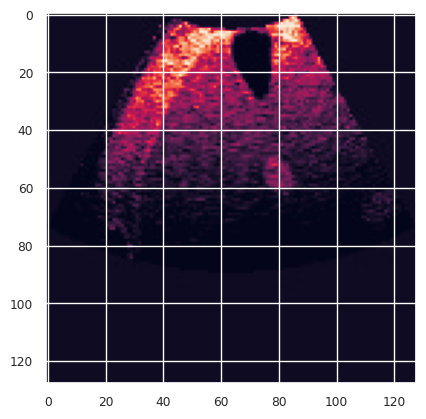

In [43]:
#Show a sample from the original dataset (correct prediction) for CNN
image_to_show = 229 # choose any random Sample since all were classified correctly
from_group = 'test' # 'train' or 'test'
if from_group == 'train':
    plt.imshow(x_train_cn[image_to_show])
    print('Ground truth label: ',y_train_cn[image_to_show])
else:
    plt.imshow(x_test_cn[image_to_show])
    print('Ground truth label: ',y_test_cn[image_to_show])
    if len(predict_x)>image_to_show:
        print('Predicted label: ',classes_x[image_to_show])

**This output supports the classification as we can see all samples predicted correctly. Any sample number that is inputed in the code chunk above will produce the correct classification predictation**

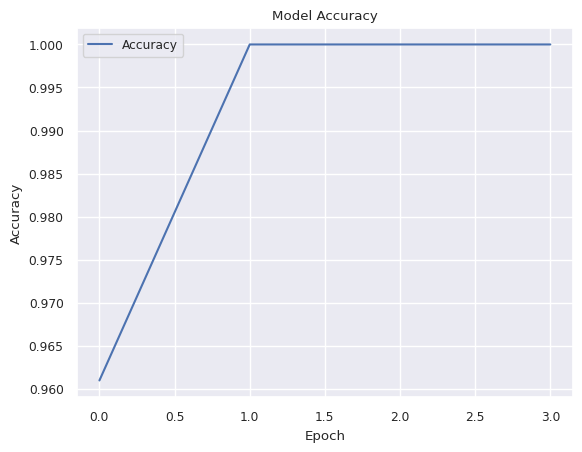

In [44]:
#visualise the accuracy and loss of CNN model
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**The accuracy is increasing across epochs when classifying the samples**

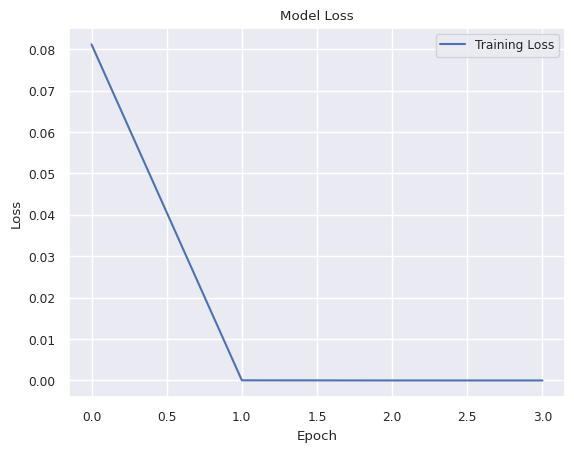

In [45]:
#visualise the loss from CNN model
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**The loss reduces and the accuracy increases across epochs**

**CNN CONFUSION MATRIX**

8/8 [==============================] - 2s 263ms/step


array([[ 46,   0],
       [  0, 185]])

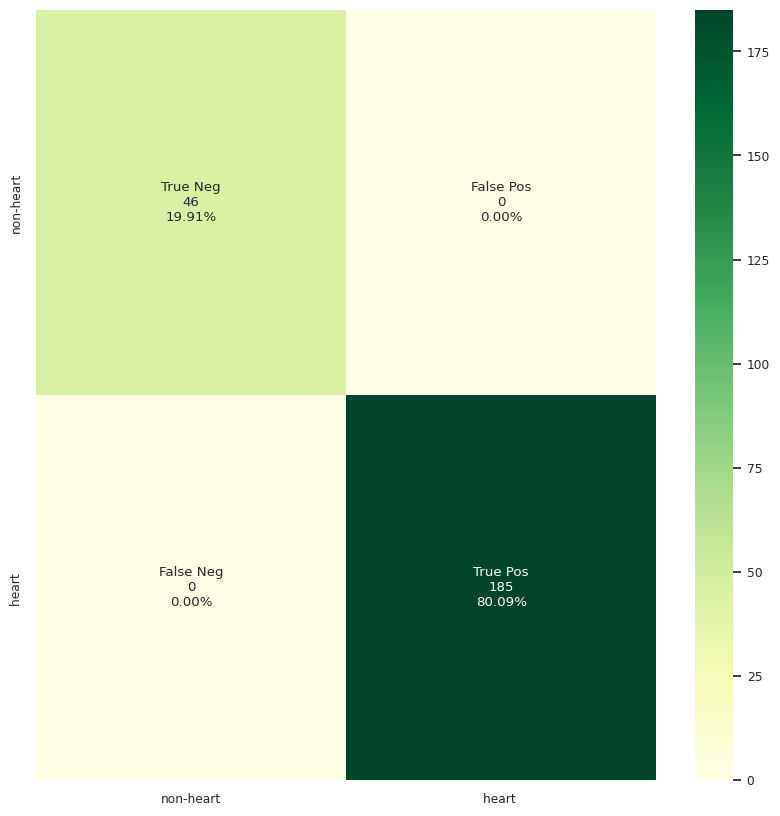

In [46]:
#CNN CONFUSION MATRIX

predictions = cnnmodel.predict(x_test_cn)
pred_labels= np.argmax(predictions,axis=1)
cf_matrix_cn = confusion_matrix(y_test_cn, pred_labels)
plt.figure(figsize = (10,10))

labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix_cn.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix_cn.flatten()/np.sum(cf_matrix_cn)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_cn, annot=labels, fmt='', cmap= "YlGn",
           xticklabels = classes,yticklabels = classes)
cf_matrix_cn

**from the confusion matrix results all samples are classified correctly with no false negatives or false positives**

**K5 FOLD CNN**

In [51]:
# Initialize KFold cross-validation
kf = KFold(n_splits=5)

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over folds
for fold_idx, (train_index, test_index) in enumerate(kf.split(originalrepo)):
    print('Fold', fold_idx + 1)
    x_train_cn, x_test_cn = originalrepo[train_index], originalrepo[test_index]
    y_train_cn, y_test_cn = target_new[train_index], target_new[test_index]

    # Defining the CNN model ( rebuilt the same archictecture as seen before)
    cnnmodel = Sequential()
    cnnmodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,1)))
    cnnmodel.add(Conv2D(32, (3, 3), activation='relu'))
    cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
    cnnmodel.add(Dropout(0.25))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dropout(0.5))
    cnnmodel.add(Dense(128, activation='relu'))
    cnnmodel.add(Dense(2, activation='sigmoid'))

    # Compile your CNN model
    cnnmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Reshape input data
    x_train_cn = x_train_cn.reshape(-1, 128, 128, 1)
    x_test_cn = x_test_cn.reshape(-1, 128, 128, 1)

    # Train your model
    cnnmodel.fit(x_train_cn, y_train_cn, epochs= 4, batch_size=32, verbose=0)

    # Predict probabilities for each class
    y_pred_probabilities = cnnmodel.predict(x_test_cn)

    # Convert probabilities to predicted classes
    y_pred_cn = np.argmax(y_pred_probabilities, axis=1)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test_cn, y_pred_cn)
    precision = precision_score(y_test_cn, y_pred_cn)
    recall = recall_score(y_test_cn, y_pred_cn)
    f1 = f1_score(y_test_cn, y_pred_cn)

    # Print evaluation metrics for each fold
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()

    # Store metrics in lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

Fold 1
8/8 [==============================] - 2s 265ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Fold 2
8/8 [==============================] - 2s 271ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Fold 3
8/8 [==============================] - 2s 279ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Fold 4
8/8 [==============================] - 3s 300ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Fold 5
8/8 [==============================] - 4s 467ms/step
Accuracy: 0.008695652173913044
Precision: 0.008695652173913044
Recall: 1.0
F1 Score: 0.017241379310344827



In [52]:
# Report the average metrics across all folds
print('Average Accuracy:', np.mean(accuracy_scores))
print('Average Precision:', np.mean(precision_scores))
print('Average Recall:', np.mean(recall_scores))
print('Average F1-Score:', np.mean(f1_scores))

Average Accuracy: 0.8017391304347827
Average Precision: 0.8017391304347827
Average Recall: 1.0
Average F1-Score: 0.803448275862069


**The CNN model perfomed lower than the SVM when running the k5 cross validation with Average scores of 80% and 100% for recall. The results were extemely low for the 5 fold which affects the average. It is important to note that in the initial CNNMODEL classificaton report was 100% across all metrics.**

**HOG FEATURES AND APPLICATION OF SMOTE**

In [53]:
#splitting the HOG features of heart and non heart images into an 80/20 training split
print(target_new,target_new.shape)
x1_train, x1_test, y1_train, y1_test = train_test_split(hogrepo,target_new, stratify=target_new, test_size=0.2)
print('Number of heart and non-heart (Abdominal) samples in the training set: ',np.count_nonzero(y1_train == 0),np.count_nonzero(y1_train == 1))
print('Number of heart and non-heart (Abdominal) samples in the test set: ',np.count_nonzero(y1_test == 0),np.count_nonzero(y1_test == 1))

[1 1 1 ... 0 0 0] (1153,)
Number of heart and non-heart (Abdominal) samples in the training set:  182 740
Number of heart and non-heart (Abdominal) samples in the test set:  46 185


In [54]:
#Visualise the HOG- SVM Classification result
# Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
x1_train_new, y1_train_new = smote.fit_resample(x1_train, y1_train)

# Initializing the SVM Classifier
hogmodel = SVC(kernel='linear', random_state=42)

# Training the data with the classifier
hogSVM = hogmodel.fit(x1_train_new, y1_train_new)

# Test the SVM model by predicting Y
y_predicted_hog = hogSVM.predict(x1_test)

# Get accuracy to evaluate the performance of the training set
hogsvmaccuracy = hogSVM.score(x1_train_new, y1_train_new)
print("HOG Training set accuracy:", hogsvmaccuracy)

# Get the confusion matrix of the SVM classifier
hogcm = confusion_matrix(y1_test, y_predicted_hog)
print("HOG Confusion Matrix:", hogcm)



HOG Training set accuracy: 1.0
HOG Confusion Matrix: [[ 46   0]
 [  0 185]]


<Axes: >

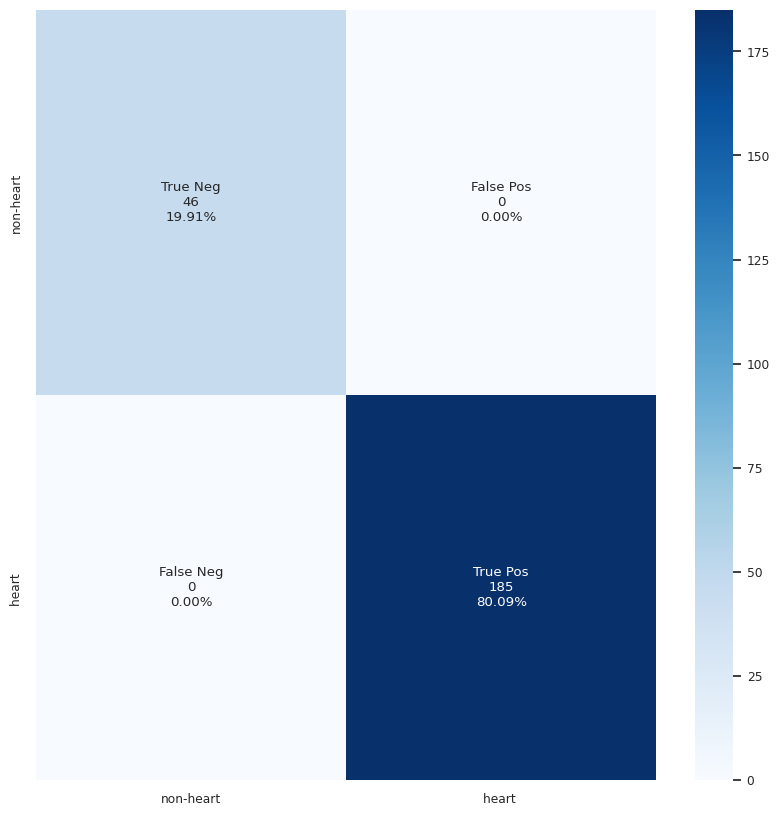

In [55]:
# Plotting the confusion matrix as a heatmap for HOG features of original data
plt.figure(figsize = (10,10))
labels = ['TN','FP','FN','TP']
classes = ['non-heart','heart ' ]
labels = np.asarray(labels).reshape(2,2)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in hogcm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in hogcm.flatten()/np.sum(hogcm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(hogcm, annot=labels, fmt='', cmap= "Blues",xticklabels = classes,yticklabels = classes)

**HOG features after the application of the smote oversampling technique still exhibits proper classifcation in SVM and it is supported by the confusion matrix with no false negatives or false positives**

In [56]:
#Generating a classification report for each class from the HOG extraction
hog_of_each_class = classification_report(y1_test,y_predicted_hog)
print('HOG FEATURES CLASSIFICATION REPORT')
print(hog_of_each_class)

HOG FEATURES CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       185

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



###**SUMMARY ONE**

The classification methods SVM, CNN, and HOG+SVM achieved 100% accuracy in classifying heart versus non-heart samples. SVM showed perfect scores across all metrics with no misclassifications, as confirmed by the confusion matrix. CNN also reached 100% accuracy, though it required more time for classification. The HOG features paired with SVM, plus SMOTE for balancing, exhibited the same high performance of the other methods.

Despite all techniques demonstrating perfect results, the choice of the most suitable classifier depends on specific needs, such as processing time. With both the original and HOG-enhanced data providing precise predictions, the models reliably distinguished between classes. CNN's robustness in handling imbalanced data makes it especially pertinent for medical imaging, justifying the longer processing time for complex pattern detection.

Considering the visual distinction in the dataset between heart and non-heart images, it will be expected that the accuracy and other metrics will be 100% after classification. We probe further in task 2.



---



## **TASK TWO**

CNN is selected to assess its efficacy in effectively classifying these heart images with different valve positions.

For these experiments, precision, recall, F1 score, accuracy, confusion matrix, and AUC-ROC will be reported and compared to analyse the results. The focus of the experiments is solely on CNN classification.



---

**DEFINING VARIABLES AND LOADING DATASETS**


Calculating class distribution...
    Class  Number of Samples
0  closed                 80
1    open                138
Total images: 218

Showing class distribution bar chart...


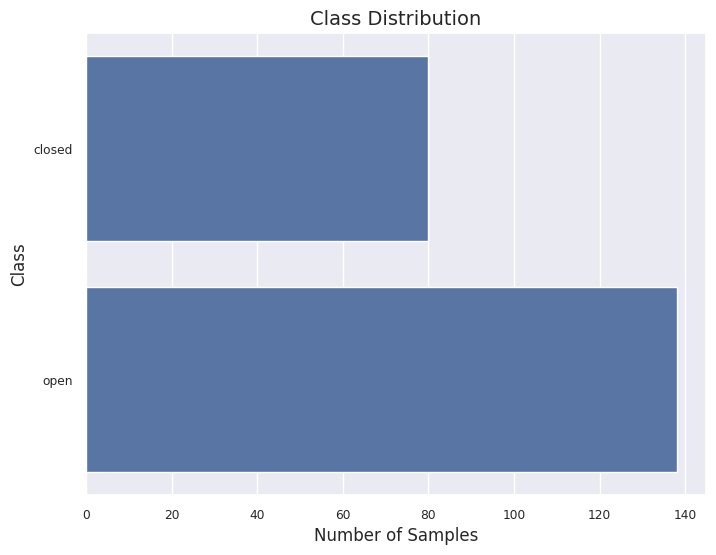

Size of target:  218
Size of original repository:  (218, 16384)
Example of the original repository: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Class Labels ['closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'clos

In [60]:
########  2. LOAD IMAGES (FOR ORIGINAL REPO) ########

resize_width = 128
resize_height = 128
path = '/content/drive/MyDrive/Colab Notebooks/cwdata_task2/heart'
images = [] # List to append the images as 2D numpy arrays.
target1 = [] # List to append the target
originalrepo1 = [] # Create a repo for flattened pixels

for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0)
                img = cv2.resize(img, (resize_width, resize_height))
                images.append(img)
                # Append the flattened image to the pixel repo
                originalrepo1.append(img.flatten())
                # Append the folder where the image is to the target list
                target1.append(root.replace(path,'').replace('\\','').replace('/',''))
            except Exception as e:
                print("Invalid file "+file+" skipped.")
# Convert the repo list into numpy array
originalrepo1 = np.array(originalrepo1)

########################## 3. CALCULATE THE DISTRIBUTION AND SHOW REPOS ##########################

print('\nCalculating class distribution...')
histo = [['Class','Number of Samples']]
for i, label1 in enumerate(sorted(list(set(target1)))):
    cont = 0
    for j, label2 in enumerate(target1):
        if label1 == label2:
            cont+=1
    histo.append([label1,cont])
histo.append(['Total Samples', len(target1)])
## Load as a panda
histo_panda = pd.DataFrame.from_records(histo[1:-1], columns=histo[0])
print(histo_panda)
print('Total images: '+str(len(target1)))
## Create a histogram using seaborn
sns_plot = sns.barplot(y="Class", x="Number of Samples", data=histo_panda)
# Set labels and title
sns_plot.set_xlabel("Number of Samples", fontsize=12)
sns_plot.set_ylabel("Class", fontsize=12)
sns_plot.set_title("Class Distribution", fontsize=14)
sns_plot.figure.set_size_inches(8,6)
sns.set(font_scale=0.8)
print('\nShowing class distribution bar chart...')
plt.show()
print('Size of target: ', len(target1))
print('Size of original repository: ', originalrepo1.shape)
print('Example of the original repository: ')
print(originalrepo1)
print('Class Labels',target1)

**DISPLAYING THE OPEN HEART SAMPLES**

 Open Heart Images


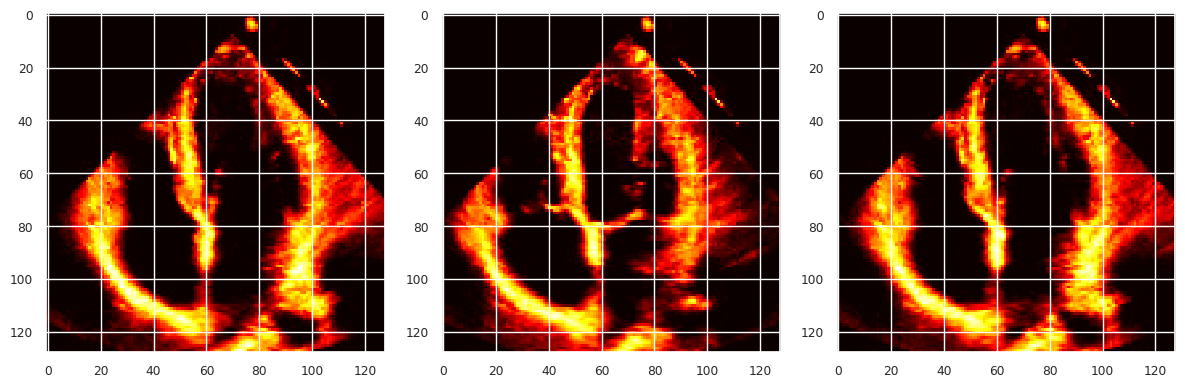

In [61]:
#Display the open heart x ray images in hot colour scale for better visualization
openheart = originalrepo1[np.asarray(target1) == 'open']

openheart_sample = random.sample(range(len(openheart)), 3)
fig,axes = plt.subplots(1,3, figsize=[12,9])

fig.tight_layout() # add spacing between subplots
for i, dat in enumerate(axes.flatten()):
    if i<len(openheart_sample): # This "if" is here to avoid that, if the user specifies more subplots than data, the program crashes due to lack of data to plot
        dat.imshow(np.asarray(openheart[openheart_sample[i]]).reshape(128,128),
                   cmap='hot', interpolation='nearest')
print(' Open Heart Images')
plt.show()

**DISPLAYING THE CLOSED HEART SAMPLES**

 Closed Heart Images


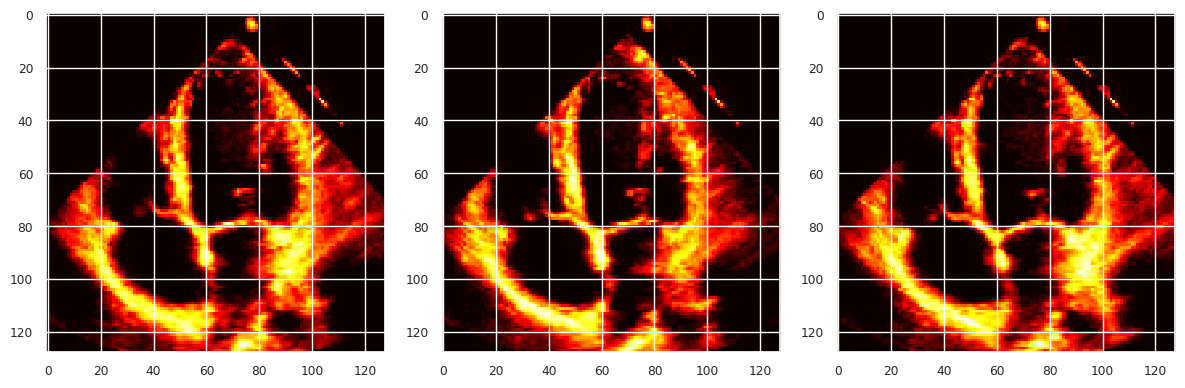

In [62]:
#Display the closed heart x ray images using hot color scale, for better visualition
closedheart = originalrepo1[np.asarray(target1) == 'closed']

closedheart_sample = random.sample(range(len(closedheart)), 3)
fig,axes = plt.subplots(1,3, figsize=[12,9])

fig.tight_layout() # add spacing between subplots
for i, dat in enumerate(axes.flatten()):
    if i<len(closedheart_sample): # This "if" is here to avoid that, if the user specifies more subplots than data, the program crashes due to lack of data to plot
        dat.imshow(np.asarray(closedheart[closedheart_sample[i]]).reshape(128,128),
                   cmap='hot', interpolation='nearest')
print(' Closed Heart Images')
plt.show()

**TRAINING THE DATASET**

Binarizing the target names
Splittling the dataset 80/20

In [63]:
#binarizing target names
target_heart = [0 if i == 'closed' else 1 for i in target1]
target_heart =np.array(target_heart)
print(target_heart,target_heart.shape)
X_train, X_test, Y_train, Y_test = train_test_split(originalrepo1,target_heart, stratify=target_heart, test_size=0.2)
print('Number of closed and open heart samples in the training set: ',np.count_nonzero(Y_train == 0),np.count_nonzero(Y_train == 1))
print('Number of closed and open heart samples in the test set: ',np.count_nonzero(Y_test == 0),np.count_nonzero(Y_test == 1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] (218,)
Number of closed and open heart samples in the training set:  64 110
Number of closed and open heart samples in the test set:  16 28


**CNN CLASSIFICATION OF DATASET 2**

In [64]:
# Reshape into four dimensions.
X_train = X_train.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)
# Convert to float 32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalise
X_train /= 255
X_test /= 255

In [65]:
#print shapes
print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)

(44, 128, 128, 1)
(44,)
(174, 128, 128, 1)
(174,)


In [66]:
#training the model
cnnmodel2 = Sequential()

cnnmodel2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,1)))
cnnmodel2.add(Conv2D(32, (3, 3), activation='relu'))
cnnmodel2.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel2.add(Dropout(0.25))
cnnmodel2.add(Flatten())
cnnmodel2.add(Dropout(0.5))
cnnmodel2.add(Dense(128, activation='relu'))
cnnmodel2.add(Dense(2, activation='sigmoid'))

In [67]:
#printing out the model summary
cnnmodel2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 conv2d_29 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 flatten_14 (Flatten)        (None, 123008)            0         
                                                                 
 dropout_29 (Dropout)        (None, 123008)            0         
                                                     

In [68]:
#Training the CNN Model
cnnmodel2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = cnnmodel2.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
6/6 [==============================] - 10s 1s/step - loss: 0.9524 - accuracy: 0.5690
Epoch 2/10
6/6 [==============================] - 9s 1s/step - loss: 0.5565 - accuracy: 0.6322
Epoch 3/10
6/6 [==============================] - 10s 2s/step - loss: 0.4202 - accuracy: 0.8908
Epoch 4/10
6/6 [==============================] - 8s 1s/step - loss: 0.2462 - accuracy: 0.9483
Epoch 5/10
6/6 [==============================] - 10s 2s/step - loss: 0.1530 - accuracy: 0.9540
Epoch 6/10
6/6 [==============================] - 10s 2s/step - loss: 0.1675 - accuracy: 0.9540
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 0.1193 - accuracy: 0.9770
Epoch 8/10
6/6 [==============================] - 10s 2s/step - loss: 0.0980 - accuracy: 0.9770
Epoch 9/10
6/6 [==============================] - 9s 1s/step - loss: 0.0865 - accuracy: 0.9770
Epoch 10/10
6/6 [==============================] - 9s 1s/step - loss: 0.0869 - accuracy: 0.9655


**Due to data shuffling between epochs, accuracy may fluctuate with each run. As the model trains across epochs, an increase in accuracy and a corresponding decrease in loss are typically observed.**

In [69]:
# Evaluate model on test data
loss, accuracy = cnnmodel2.evaluate(X_test, Y_test, verbose=0)
print('Loss: ', loss,'\nAcc: ', accuracy)

Loss:  0.14518000185489655 
Acc:  0.9772727489471436


In [70]:
#Check the labels that have been predicted
predict_x1= cnnmodel2.predict(X_test)
classes_x1=np.argmax(predict_x1,axis=1)
print(classes_x1)

2/2 [==============================] - 0s 101ms/step
[1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 0 1 0 1]


In [73]:
# Check the label that has been predicted incorrectly
incorrect_labels = []
accuracy = 0

for i, cla in enumerate(classes_x1):
    if cla != Y_test[i]:
        print("Sample " + str(i) + " was classified as " + str(cla) + " when it really was " + str(Y_test[i]))
        incorrect_labels.append(i)
    else:
        print("Sample " + str(i) + " classified correctly")

Sample 0 classified correctly
Sample 1 classified correctly
Sample 2 classified correctly
Sample 3 classified correctly
Sample 4 classified correctly
Sample 5 classified correctly
Sample 6 classified correctly
Sample 7 classified correctly
Sample 8 classified correctly
Sample 9 classified correctly
Sample 10 classified correctly
Sample 11 classified correctly
Sample 12 classified correctly
Sample 13 classified correctly
Sample 14 classified correctly
Sample 15 classified correctly
Sample 16 classified correctly
Sample 17 classified correctly
Sample 18 classified correctly
Sample 19 classified correctly
Sample 20 classified correctly
Sample 21 classified correctly
Sample 22 classified correctly
Sample 23 classified correctly
Sample 24 classified correctly
Sample 25 classified correctly
Sample 26 classified correctly
Sample 27 classified correctly
Sample 28 was classified as 0 when it really was 1
Sample 29 classified correctly
Sample 30 classified correctly
Sample 31 classified correctl

**One sample was classified incorrectly, we an check this below**

Ground truth label:  0
Predicted label:  0


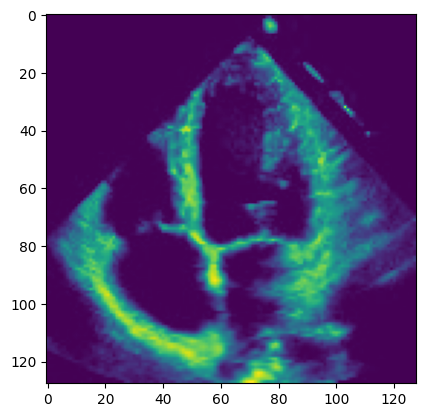

In [ ]:
#Show a sample from the heart dataset (correct prediction)
image_to_show = 36  #sample number
from_group = 'test' # 'train' or 'test'
if from_group == 'train':
    plt.imshow(X_train[image_to_show])
    print('Ground truth label: ',Y_train[image_to_show])
else:
    plt.imshow(X_test[image_to_show])
    print('Ground truth label: ',Y_test[image_to_show])
    if len(predict_x1)>image_to_show:
        print('Predicted label: ',classes_x1[image_to_show])

Ground truth label:  1
Predicted label:  0


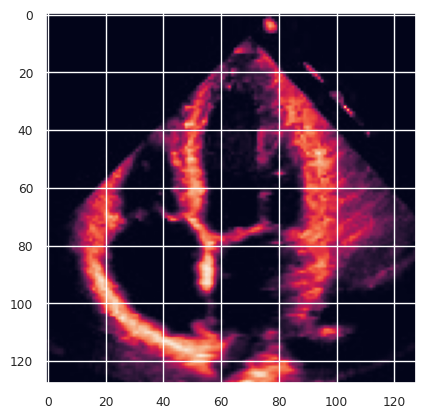

In [74]:
#Show a sample from the heart dataset (incorrect prediction)
image_to_show = 28 #sample number
from_group = 'test' # 'train' or 'test'
if from_group == 'train':
    plt.imshow(X_train[image_to_show])
    print('Ground truth label: ',Y_train[image_to_show])
else:
    plt.imshow(X_test[image_to_show])
    print('Ground truth label: ',Y_test[image_to_show])
    if len(predict_x1)>image_to_show:
        print('Predicted label: ',classes_x1[image_to_show])

**Sample 28 is the incorrectly classified sample**

**CONFUSION MATRIX FOR CNN**

2/2 [==============================] - 1s 243ms/step


<Figure size 1000x1000 with 0 Axes>

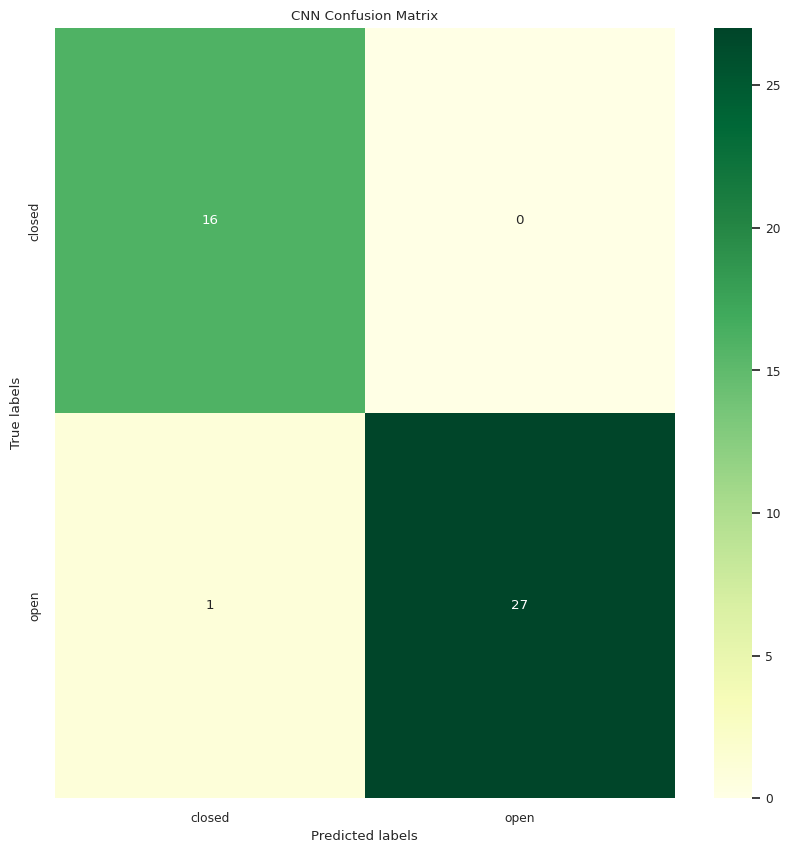

In [76]:
#CNN CONFUSION MATRIX

predictions1 = cnnmodel2.predict(X_test)
pred_labels1= np.argmax(predictions1,axis=1)
cf_matrix_cn_2 = confusion_matrix(Y_test, pred_labels1)
plt.figure(figsize = (10,10))

classes = ['closed', 'open']

# Your confusion matrix computation
cf_matrix_cn_2 = confusion_matrix(Y_test, pred_labels1)

plt.figure(figsize=(10, 10))
sns.heatmap(cf_matrix_cn_2, annot=True, fmt='d', cmap="YlGn",
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('CNN Confusion Matrix')
plt.show()

**The confusion matrix supports the classification results, with only one sample, number 28, being misclassified as a false negative—an open heart identified as a closed heart.**

**CNN CLASSIFICATION REPORT**

In [77]:
# Convert probabilities to class labels
y_cnn_labels = np.argmax(predict_x1, axis=1)

#print classification report for CNN
cnn_report_of_each_class = classification_report(Y_test, y_cnn_labels)
print('CNN CLASSIFICATION REPORT OF HEART IMAGES')
print(cnn_report_of_each_class)

CNN CLASSIFICATION REPORT OF HEART IMAGES
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.96      0.98        28

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



**AUC-ROC EVALUATION METRIC**

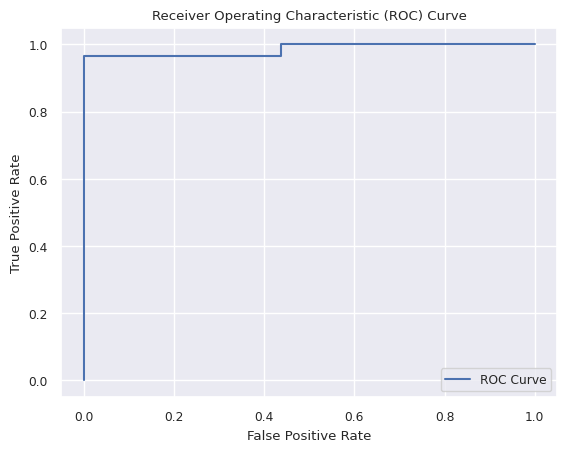

ROC AUC: 0.984375


In [81]:
# Convert predictions to class labels
predicted_labels = np.argmax(predictions1, axis=1)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, predictions1[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Print the ROC Value
roc_auc = roc_auc_score(Y_test, predictions1[:, 1])
print("ROC AUC:", roc_auc)

**VISUALISING THE MODEL ACCURACY AGAINST LOSS**

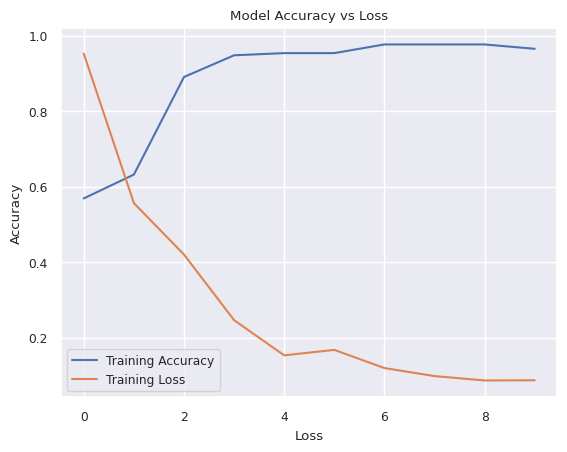

In [82]:
#visualise the training accuracy against the loss
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['loss'], label='Training Loss')
plt.title('Model Accuracy vs Loss')
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##**SUMMARY TWO**

The CNN model's accuracy varies with each run. The model's average accuracy stands at 97.7% with a loss of 0.145, showcasing effective training with improved accuracy over time.

The confusion matrix shows predictive accuracy, with only one open heart sample misclassified as closed. High precision, recall, and F1-scores are evident in the classification report, with 98% overall accuracy and a ROC AUC of 0.984375, reflecting the model's strong discriminatory power between open and closed heart states.

CNN is a good classifier for classifying medical images or images in general



---






## **TASK THREE**
**The training set from the previous task is used to apply transfer learning and pre-trained techniques and then predicted against the test set. Also Same will applied using U-NET and performance of both models will be . CNN architecture will be used**

**The masks, countours and heart images will be imported for U-NET**

**IMAGE DATA GEN**

In [84]:
#converting grayscale images to RGB format
#bringing in the training set from task 2
X_train_rgb = np.zeros((X_train.shape[0], 128, 128, 3))

# Fill the RGB channels with the grayscale values
X_train_rgb[:, :, :, 0] = X_train[:, :, :, 0]
X_train_rgb[:, :, :, 1] = X_train[:, :, :, 0]
X_train_rgb[:, :, :, 2] = X_train[:, :, :, 0]

X_test_rgb = np.zeros((X_test.shape[0], 128,128, 3))
X_test_rgb[:, :, :, 0] = X_test[:, :, :, 0]
X_test_rgb[:, :, :, 1] = X_test[:, :, :, 0]
X_test_rgb[:, :, :, 2] = X_test[:, :, :, 0]

In [85]:
datagen = ImageDataGenerator(

      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      rotation_range = 30,
      zoom_range = 0.2,

      width_shift_range = 0.1,
      height_shift_range = 0.1,
      horizontal_flip = True,
      vertical_flip=False)

datagen.fit(X_train_rgb) # Adding the traing samples from task 2 to the  data gen

**APPLICATION OF TRANSFERRED LEARNING**

In [86]:
from keras.applications.vgg16 import VGG16 #(if you want to use VG16)
from keras.applications.inception_v3 import InceptionV3

# Notice 1st time this is being run, it will download the weights for the ResNet model
tf.keras.backend.clear_session()
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(128, 128, 3),
    include_top=False)
# freeze the layers
base_model.trainable = False

234545216/234545216 [==============================] - 6s 0us/step


In [87]:
#defining the pre-trained model class " get_trained"
def get_pretrained():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(128,128, 3))

    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=[inputs], outputs=output)

    return model

In [88]:
#training the model
model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 4, 4, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

**Calculating the class weights**

In [89]:
from sklearn.utils.class_weight import compute_class_weight
# Assuming Y_train contains label training data
# Compute class frequencies
class_labels, class_counts = np.unique(Y_train, return_counts=True)

# Compute class weights
total_samples = np.sum(class_counts)
class_weights = {class_labels[i]: total_samples / (len(class_labels) * class_counts[i]) for i in range(len(class_labels))}

# Print class weights
print("Class weights:", class_weights)

Class weights: {0: 1.359375, 1: 0.7909090909090909}


**Calculating the learning rate reduction**

In [90]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, factor = 0.3, min_lr = 0.000001)

In [93]:
# Split the training data into training and validation sets
X_train_partial, X_val, Y_train_partial, Y_val = train_test_split(X_train_rgb, Y_train, test_size=0.2, random_state=42)

# Train your model on the training subset
history_2 = model_pretrained.fit(
    X_train_partial, Y_train_partial,
    epochs=15,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

# Evaluate the model on the validation subset
val_loss, val_accuracy = model_pretrained.evaluate(X_val, Y_val)
print("Validation accuracy:", val_accuracy)


Epoch 1/15
5/5 [==============================] - 30s 5s/step - loss: 0.3572 - binary_accuracy: 0.8633 - val_loss: 0.2670 - val_binary_accuracy: 0.9429
Epoch 2/15
5/5 [==============================] - 25s 5s/step - loss: 0.3257 - binary_accuracy: 0.8921 - val_loss: 0.2521 - val_binary_accuracy: 0.9429
Epoch 3/15
5/5 [==============================] - 29s 6s/step - loss: 0.3239 - binary_accuracy: 0.9209 - val_loss: 0.2391 - val_binary_accuracy: 0.9429
Epoch 4/15
5/5 [==============================] - 33s 7s/step - loss: 0.2934 - binary_accuracy: 0.9065 - val_loss: 0.2270 - val_binary_accuracy: 0.9429
Epoch 5/15
5/5 [==============================] - 26s 5s/step - loss: 0.2912 - binary_accuracy: 0.9065 - val_loss: 0.2165 - val_binary_accuracy: 0.9429
Epoch 6/15
5/5 [==============================] - 30s 6s/step - loss: 0.2748 - binary_accuracy: 0.9353 - val_loss: 0.2075 - val_binary_accuracy: 0.9429
Epoch 7/15
5/5 [==============================] - 25s 5s/step - loss: 0.2722 - binary_ac

In [96]:
# Evaluate model on test data from task 2
loss, accuracy = model_pretrained.evaluate(X_test_rgb, Y_test, verbose=0)
print('Loss: ', loss,'\nAcc: ', accuracy)

Loss:  0.27312496304512024 
Acc:  0.9090909361839294


**results predicted against the test shows 0.27 loss and 0.90 Accuracy**

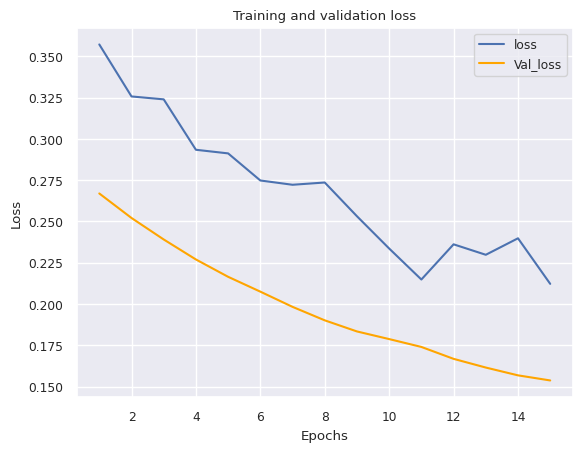

In [97]:
# Extract loss history from history_2 object
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

# Plotting the loss and validation loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='loss')
plt.plot(epochs, val_loss, 'orange', label='Val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

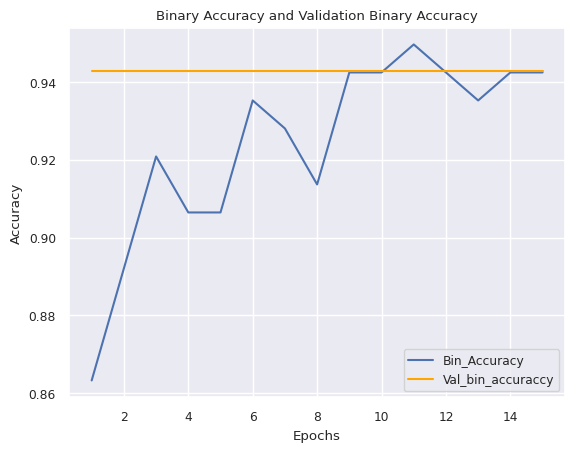

In [98]:
# Extract binary accuracy history from history_2 object
binary_accuracy = history_2.history['binary_accuracy']
val_binary_accuracy = history_2.history['val_binary_accuracy']

# Plotting the binary accuracy in blue and validation binary accuracy in orange
epochs = range(1, len(binary_accuracy) + 1)
plt.plot(epochs, binary_accuracy, 'b', label='Bin_Accuracy')
plt.plot(epochs, val_binary_accuracy, 'orange', label='Val_bin_accuraccy')
plt.title('Binary Accuracy and Validation Binary Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [99]:
print("Loss of the model is - " , model_pretrained.evaluate(X_test_rgb,Y_test)[0])
print("Accuracy of the model is - " , model_pretrained.evaluate(X_test_rgb,Y_test)[1]*100 , "%")

2/2 [==============================] - 6s 2s/step - loss: 0.2731 - binary_accuracy: 0.9091
Loss of the model is -  0.27312496304512024
2/2 [==============================] - 7s 2s/step - loss: 0.2731 - binary_accuracy: 0.9091
Accuracy of the model is -  90.90909361839294 %


In [108]:
predictions = model_pretrained.predict(X_test_rgb)
pred_labels= np.where(predictions>0.5, 1, 0)

2/2 [==============================] - 11s 2s/step


**CLASSIFICATION REPORT**

In [111]:
#print classification report for CNN
cnn_report_of_each_class = classification_report(Y_test, pred_labels)
print('TRANSFER LEARNING CNN CLASSIFICATION REPORT OF HEART IMAGES')
print(cnn_report_of_each_class)

TRANSFER LEARNING CNN CLASSIFICATION REPORT OF HEART IMAGES
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.93      0.93      0.93        28

    accuracy                           0.91        44
   macro avg       0.90      0.90      0.90        44
weighted avg       0.91      0.91      0.91        44



array([[14,  2],
       [ 2, 26]])

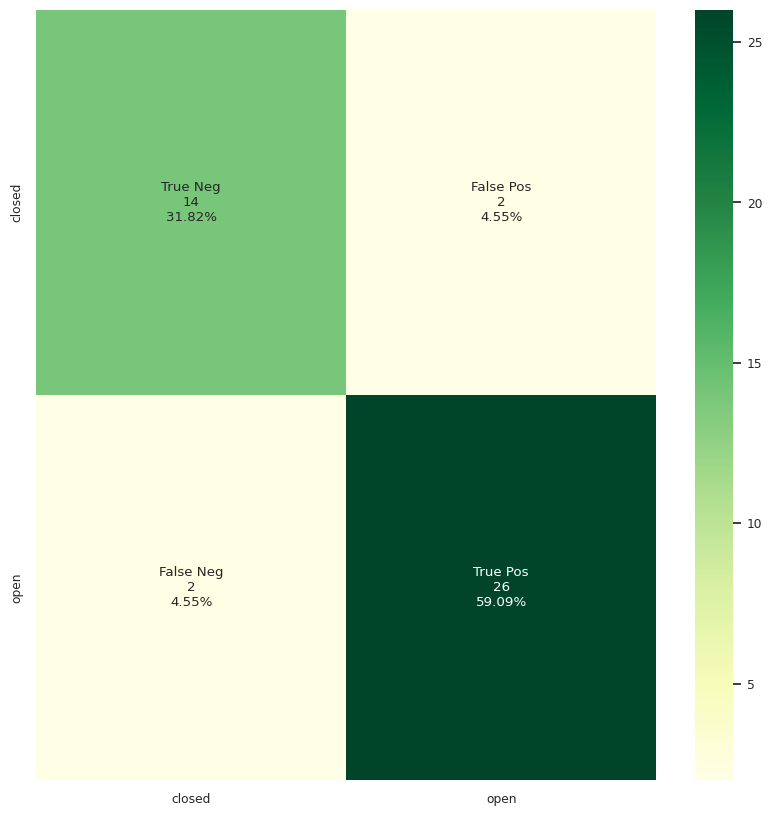

In [112]:
cf_matrix_3 = confusion_matrix(Y_test, pred_labels)
plt.figure(figsize = (10,10))

labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix_3.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix_3.flatten()/np.sum(cf_matrix_3)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_3, annot=labels, fmt='', cmap= "YlGn",
           xticklabels = classes,yticklabels = classes)
cf_matrix_3

**For tranfer learning the accuracy was approx 91%, meaning some samples wwould have been classified wrongly. 2 Open hearts classified has closed and 2 closed hearts classified as open.**

**FINE TUNING THE MODEL**

Fine tuning the model with the same architecture to see if the performance will be better.

In [102]:
#Fine tunning
base_model.trainable = True

# Retrain the last 5 layers (all lower layers will be kept frozen)
for layer in base_model.layers[:-5]:
    layer.trainable = False

In [103]:
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = tf.keras.optimizers.Adam(learning_rate=0.000005), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 4, 4, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [104]:
# Train your model on the training subset
history_ft = model_pretrained.fit(
    X_train_partial, Y_train_partial,
    epochs=15,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

# Evaluate the model on the validation subset
val_loss, val_accuracy = model_pretrained.evaluate(X_val, Y_val)
print("Validation accuracy:", val_accuracy)

Epoch 1/15
5/5 [==============================] - 48s 8s/step - loss: 0.3759 - binary_accuracy: 0.9496 - val_loss: 0.1597 - val_binary_accuracy: 0.9429
Epoch 2/15
5/5 [==============================] - 27s 6s/step - loss: 0.3604 - binary_accuracy: 0.9568 - val_loss: 0.1677 - val_binary_accuracy: 0.9429
Epoch 3/15
5/5 [==============================] - 34s 7s/step - loss: 0.3497 - binary_accuracy: 0.9496 - val_loss: 0.1745 - val_binary_accuracy: 0.9714
Epoch 4/15
5/5 [==============================] - 35s 8s/step - loss: 0.3437 - binary_accuracy: 0.9424 - val_loss: 0.1811 - val_binary_accuracy: 0.9714
Epoch 5/15
5/5 [==============================] - 27s 5s/step - loss: 0.3293 - binary_accuracy: 0.9424 - val_loss: 0.1873 - val_binary_accuracy: 0.9714
Epoch 6/15
5/5 [==============================] - 38s 8s/step - loss: 0.3157 - binary_accuracy: 0.9496 - val_loss: 0.1928 - val_binary_accuracy: 0.9714
Epoch 7/15
5/5 [==============================] - 31s 7s/step - loss: 0.3104 - binary_ac

In [115]:
print("Loss of the model is - " , model_pretrained.evaluate(X_test_rgb,Y_test)[0])
print("Accuracy of the model is - " , model_pretrained.evaluate(X_test_rgb,Y_test)[1]*100 , "%")

2/2 [==============================] - 7s 2s/step - loss: 0.2860 - binary_accuracy: 0.9091
Loss of the model is -  0.2860245406627655
2/2 [==============================] - 5s 1s/step - loss: 0.2860 - binary_accuracy: 0.9091
Accuracy of the model is -  90.90909361839294 %


In [116]:
predictions2 = model_pretrained.predict(X_test_rgb)
pred_labels2= np.where(predictions>0.5, 1, 0)

2/2 [==============================] - 10s 2s/step


**CLASSIFICATION REPORT**

In [121]:
cnn_report_of_each_class1 = classification_report(Y_test, pred_labels2)
print('FINE TUNING- CNN CLASSIFICATION REPORT OF HEART IMAGES')
print(cnn_report_of_each_class1)

FINE TUNING- CNN CLASSIFICATION REPORT OF HEART IMAGES
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.93      0.93      0.93        28

    accuracy                           0.91        44
   macro avg       0.90      0.90      0.90        44
weighted avg       0.91      0.91      0.91        44



array([[14,  2],
       [ 2, 26]])

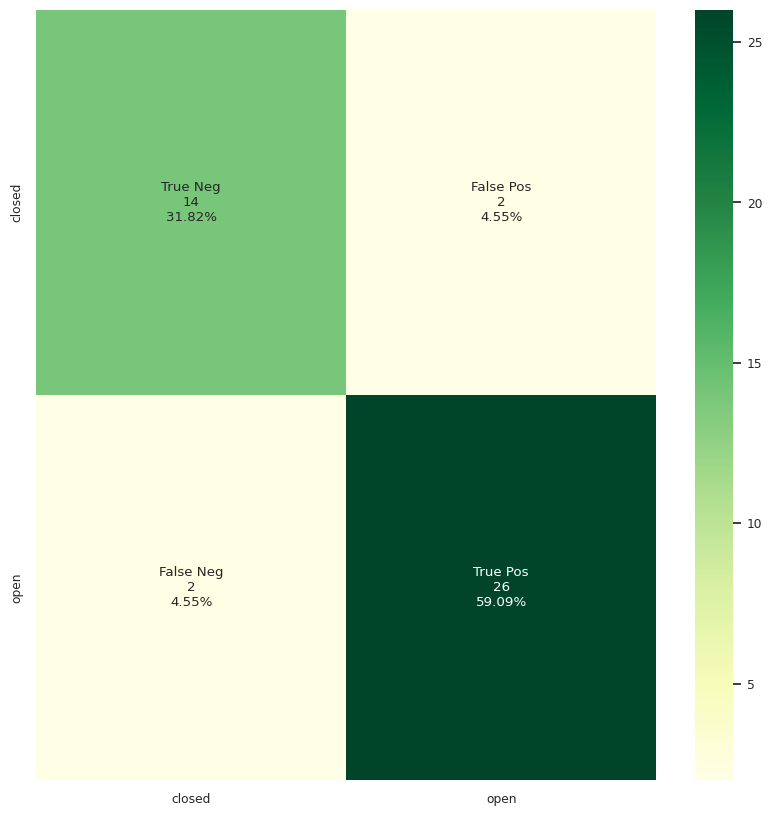

In [118]:
cf_matrix_ft = confusion_matrix(Y_test, pred_labels2)
plt.figure(figsize = (10,10))

labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix_ft.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix_ft.flatten()/np.sum(cf_matrix_3)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_ft, annot=labels, fmt='', cmap= "YlGn",
           xticklabels = classes,yticklabels = classes)
cf_matrix_ft

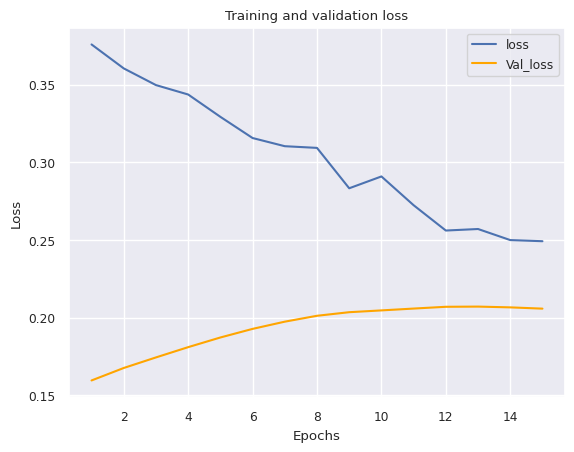

In [119]:
# Extract loss history from history_ft object
loss = history_ft.history['loss']
val_loss = history_ft.history['val_loss']

# Plotting the loss and validation loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='loss')
plt.plot(epochs, val_loss, 'orange', label='Val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

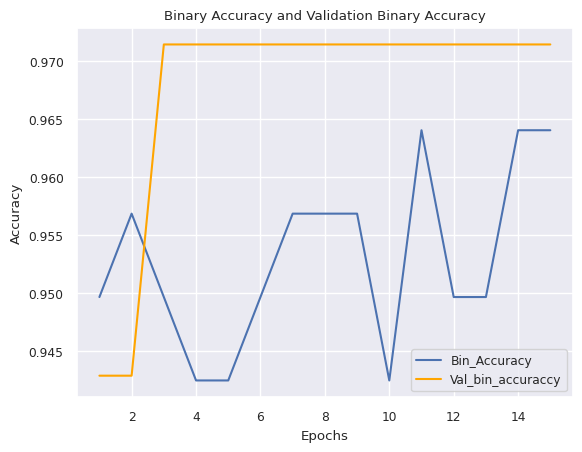

In [120]:
# Extract binary accuracy history from history_ft object
binary_accuracy = history_ft.history['binary_accuracy']
val_binary_accuracy = history_ft.history['val_binary_accuracy']

# Plotting the binary accuracy in blue and validation binary accuracy in orange
epochs = range(1, len(binary_accuracy) + 1)
plt.plot(epochs, binary_accuracy, 'b', label='Bin_Accuracy')
plt.plot(epochs, val_binary_accuracy, 'orange', label='Val_bin_accuraccy')
plt.title('Binary Accuracy and Validation Binary Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##**ATTEMPTING U-NET**

**LOADING DATA HEART AND MASKS FOR U-NET CLASSIFCATION**

In [197]:
#code reference [8 & 9]
input_path = '/content/drive/MyDrive/Colab Notebooks/cwdata_unet/heart'
mask_path = '/content/drive/MyDrive/Colab Notebooks/cwdata_unet/masks'

heart_images = []
mask_images = []

for img_name in os.listdir(input_path):
    img_path = os.path.join(input_path, img_name)

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    mask_name = img_name

    mask_img_path = os.path.join(mask_path, mask_name)
    mask = cv2.imread(mask_img_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        print(f"Skipping {img_name}: Mask image could not be loaded.")
        continue
    if img.shape != mask.shape:
        print(f"Skipping {img_name} and {mask_name}: Image and mask shapes are not consistent.")
        continue
    heart_images.append(img)
    mask_images.append(mask)

In [198]:

heart_images = np.asarray(heart_images).astype(np.float32)
mask_images = np.asarray(mask_images).astype(np.float32)

heart_images = heart_images / 255
mask_images = mask_images/ 255

heart_images = heart_images.reshape((-1, 128, 128, 1))
mask_images = mask_images.reshape((-1, 128, 128, 1))

print("Shape of heart_images:", heart_images.shape)
print("Shape of mask_images:", mask_images.shape)

Shape of heart_images: (218, 128, 128, 1)
Shape of mask_images: (218, 128, 128, 1)


In [199]:
#Splitting the data
xu_train, xu_test, yu_train, yu_test = train_test_split(heart_images, mask_images, test_size=0.2, random_state=42)

In [207]:
def unet_model(optimizer='adam'):
    inputs = keras.Input(shape=(128, 128, 1))

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    pool1 = layers.BatchNormalization()(pool1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    pool2 = layers.BatchNormalization()(pool2)

    # Decoder
    up1 = layers.UpSampling2D(size=(2, 2))(pool2)
    up1 = layers.concatenate([conv2, up1], axis=3)
    up1 = layers.BatchNormalization()(up1)
    conv3 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up1)
    conv3 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)

    up2 = layers.UpSampling2D(size=(2, 2))(conv3)
    up2 = layers.concatenate([conv1, up2], axis=3)
    up2 = layers.BatchNormalization()(up2)
    conv4 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up2)
    conv4 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(conv4)

    unetmodel = models.Model(inputs=inputs, outputs=outputs)

    unetmodel.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall', 'f1_score'])

    return unetmodel



In [211]:
#Train model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
unethistory = model.fit(xu_train, yu_train, epochs=5, validation_data=(xu_test, yu_test))


Epoch 1/5
6/6 [==============================] - 244s 42s/step - loss: 0.4113 - accuracy: 0.6315 - val_loss: 0.5608 - val_accuracy: 0.6183
Epoch 2/5
6/6 [==============================] - 226s 39s/step - loss: 0.2625 - accuracy: 0.7012 - val_loss: 0.4468 - val_accuracy: 0.6732
Epoch 3/5
6/6 [==============================] - 224s 39s/step - loss: 0.2168 - accuracy: 0.7103 - val_loss: 0.4177 - val_accuracy: 0.6639
Epoch 4/5
6/6 [==============================] - 198s 33s/step - loss: 0.1919 - accuracy: 0.7149 - val_loss: 0.4097 - val_accuracy: 0.6583
Epoch 5/5
6/6 [==============================] - 212s 36s/step - loss: 0.1783 - accuracy: 0.7170 - val_loss: 0.3809 - val_accuracy: 0.6692


In [214]:
print("Loss of the model is - ", model.evaluate(xu_test, yu_test)[0])
print("Accuracy of the model is - ", model.evaluate(xu_test, yu_test)[1] * 100, "%")


2/2 [==============================] - 16s 3s/step - loss: 0.3809 - accuracy: 0.6692
Loss of the model is -  0.380896657705307
2/2 [==============================] - 13s 3s/step - loss: 0.3809 - accuracy: 0.6692
Accuracy of the model is -  66.92227721214294 %


2/2 [==============================] - 13s 4s/step


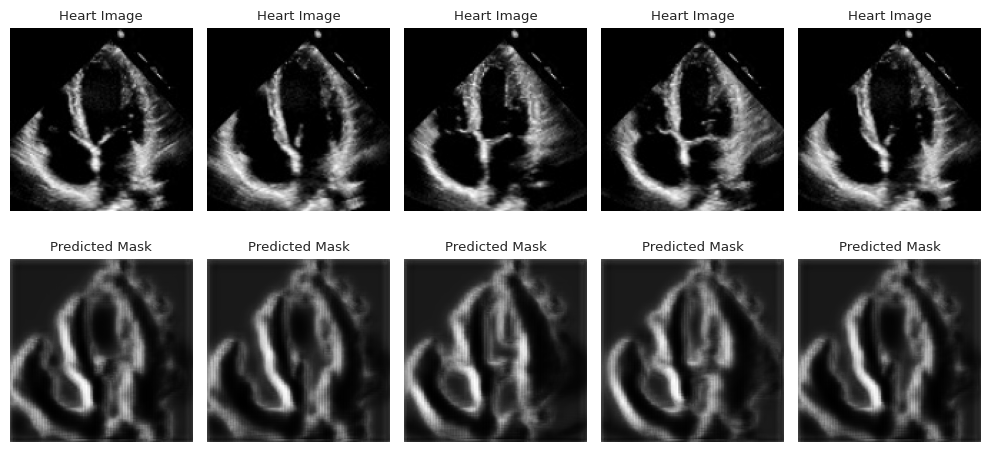

In [215]:
# Predictions for the test set
predictions = model.predict(xu_test)
# Plot heart images and corresponding predicted masks
plt.figure(figsize=(10, 5))
for i in range(5):
   # heart image
   plt.subplot(2, 5, i + 1)
   plt.imshow(xu_test[i].reshape(128, 128), cmap='gray')
   plt.title('Heart Image')
   plt.axis('off')
   # mask image
   plt.subplot(2, 5, i + 6)
   plt.imshow(predictions[i].reshape(128, 128), cmap='gray')
   plt.title('Predicted Mask')
   plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#unet_classification report
#unetreport = classification_report(yu_test, pred_labels-unet)
##print('UNET-CLASSIFICATION REPORT OF HEART IMAGES')
#print(unetreport)

##**SUMMARY THREE**

**In transfer learning, the model achieved around 91% accuracy with a test loss of 0.273, showing decreasing validation and training losses over epochs, indicating learning progress. However, there were occasional misclassifications, such as 2 open hearts identified as closed and vice versa. Fine-tuning resulted in a similar loss of 0.286 and an accuracy of approximately 90.9%, consistent with transfer learning results.**

**The U-net model achieved an accuracy of approximately 70%, which falls short of perfection. Additionally, its processing time is notable. Several factors, such as a small test size or overfitting, could have influenced this performance.**

In [217]:
####WORD COUNT#######
import io
from nbformat import current

filepath = '/content/drive/MyDrive/Colab Notebooks/CW536_2226909.ipynb' #this is the name of your coursework file!

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'ipynb')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(word_count)

1092


In [ ]:
####################### References#############################################

# 1. https://github.com/87surendra/Random-Forest-Image-Classification-using-Python/blob/master/Random-Forest-Image-Classification-using-Python.py
# 2. https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb
# 3. https://github.com/carlosfmorenog/CMM536_Data_Loading_Tutorial/blob/main/CMM536_data_loading_tutorial.ipynb
# 4. https://github.com/carlosfmorenog/CMM536_CW_2022
# 5. https://youtu.be/4ESLTAd3IOM?feature=shared
# 6. https://www.mltut.com/svm-implementation-in-python-from-scratch/
# 7. #https://github.com/codebasics/py/blob/master/ML/12_KFold_Cross_Validation/12_k_fold.ipynb
# 8  https://www.youtube.com/watch?v=IHq1t7NxS8k
# 9  https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/13_dropout_layer/dropout_regularization_ann.ipynb